In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("winequality-red_01d317de455d3f31d66e62a6393ff943.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#Quality is the target
data.shape

(1599, 12)

In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].nunique()

6

In [ ]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
#Predcit the Quality of red wine
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


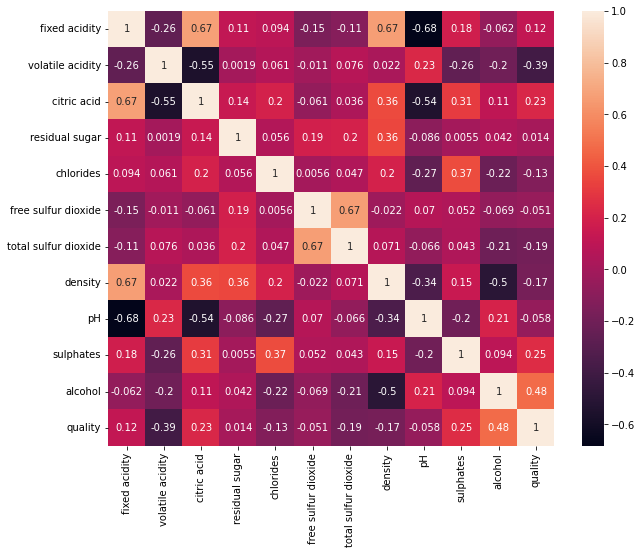

In [ ]:
#correltion matrix
corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True)


In [ ]:
#drop highly correlated(positively corr) and least correlated
data1=data.drop(['total sulfur dioxide', 'density'],axis=1)

In [ ]:
data1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,3.57,0.71,10.2,5


In [ ]:
#feature-target split
y=data1['quality']
x=data1.drop('quality',axis=1)

MODEL 1

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predictions=model1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error value",mean_squared_error(y_test,predictions))
print("R2 value",r2_score(y_test,predictions))

Mean squared error value 0.38954143094725124
R2 value 0.37027907096175594


MODEL 2 REDUCE TESTSIZE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predictions=model1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error value",mean_squared_error(y_test,predictions))
print("R2 value",r2_score(y_test,predictions))

Mean squared error value 0.3903450609484763
R2 value 0.40269080169871085


MODEL 3 REDUCING testize

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.18,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predictions=model1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error value",mean_squared_error(y_test,predictions))
print("R2 value",r2_score(y_test,predictions))

Mean squared error value 0.3935252722148992
R2 value 0.39266596869245685


r square value has further decreased

MODEL 4

In [ ]:
##DO MIN MAX SCALING
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm=MinMaxScaler(feature_range=(0,1))
X=mm.fit_transform(x)

In [ ]:
X=pd.DataFrame(X,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide','pH', 'sulphates', 'alcohol'])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.18,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model1=lr.fit(x_train,y_train)
predictions=model1.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error value",mean_squared_error(y_test,predictions))
print("R2 value",r2_score(y_test,predictions))

Mean squared error value 0.39352527221489875
R2 value 0.3926659686924574


In [ ]:
data=pd.read_excel('iris.xls')

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#target=petal width
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
corrmatrix=data.corr()

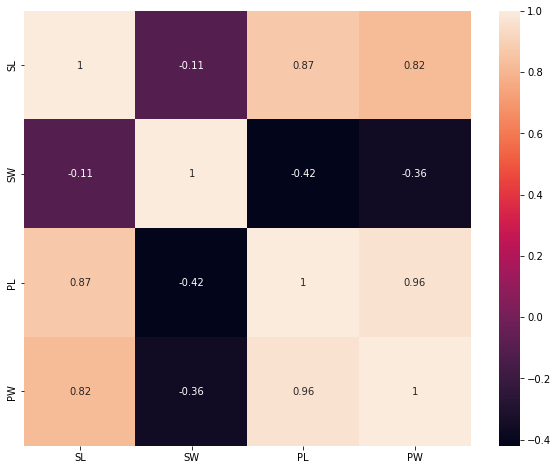

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True)

In [ ]:
#Encoding clasification column
#One hot as there are only few column

In [ ]:
data1=pd.get_dummies(data)

In [ ]:
data1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [ ]:
y=data1['PW']
x=data1.drop('PW',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error value",mean_squared_error(y_test,predictions))
print("R2 value",r2_score(y_test,predictions))

Mean squared error value 0.02934029441894715
R2 value 0.9538424636384967
